In [1]:
# import python libraries

import numpy as np
import pandas as pd
from collections import Counter
from functools import reduce
from datetime import datetime
from scipy import stats



import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline


# machine learning libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# statsmodel lribraries
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import statsmodels.api as sm
# from pylab import rcParams


In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#  Reading and understanding the data

In [4]:
# Aviation Stocks
American_Airlines = pd.read_csv("AAL.csv")
Allegiant_Travel = pd.read_csv("ALGT.csv")
Alaska_Air = pd.read_csv("ALK.csv")
Delta_AirLines = pd.read_csv("DAL.csv")
Hawaiian_Holdings = pd.read_csv("HA.csv")
Southwest_Airlines = pd.read_csv("LUV.csv")

In [5]:
# Finance Stocks
Barclays = pd.read_csv("BCS.csv")
Credit_Suisse = pd.read_csv("CS.csv")
Deutsche_Bank = pd.read_csv("DB.csv")
Goldman_Sachs = pd.read_csv("GS.csv")
Morgan_Stanley = pd.read_csv("MS.csv")
Wells_Fargo = pd.read_csv("WFC.csv")

In [6]:
# Healthcare & Pharamaceutical Stocks
Johnson_and_Johnson = pd.read_csv("JNJ.csv")
Merck_and_CO = pd.read_csv("MRK.csv")
Pfizer = pd.read_csv("PFE.csv")
UnitedHealthGroup = pd.read_csv("UNH.csv")
Bausch_Health = pd.read_csv("BHC.csv")
Roche_Holding = pd.read_csv("RHHBY.csv")

In [7]:
# TechnologyStocks
Apple = pd.read_csv("AAPL.csv")
Amazon = pd.read_csv("AMZN.csv")
Facebook = pd.read_csv("FB.csv")
Alphabet = pd.read_csv("GOOG.csv")
IBM = pd.read_csv("IBM.csv")
Microsoft = pd.read_csv("MSFT.csv")

In [8]:
# s&p index 500
SP500 = pd.read_csv("S&P500.csv")

In [9]:
American_Airlines.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/10/2010,9.29,9.39,9.21,9.29,8.758067,3603800
1,4/10/2010,9.24,9.48,9.05,9.12,8.597802,3856800
2,5/10/2010,9.27,9.35,9.15,9.23,8.701504,3896600
3,6/10/2010,9.27,9.40,9.15,9.23,8.701504,3230200
4,7/10/2010,9.30,9.31,9.07,9.24,8.710930,3877700


In [10]:
# Renaming the columns for specification
American_Airlines = American_Airlines.rename(columns = {'Open': 'AAL_Open', 'High': 'AAL_High','Low': 'AAL_Low','Close': 'AAL','Adj Close': 'AAL_Adj Close','Volume': 'AAL_Volume'}, inplace = False)
Allegiant_Travel = Allegiant_Travel.rename(columns = {'Open': 'ALGT_Open', 'High': 'ALGT_High','Low': 'ALGT_Low','Close': 'ALGT','Adj Close': 'ALGT_Adj Close','Volume': 'ALGT_Volume'}, inplace = False)
Alaska_AirLk = Alaska_Air.rename(columns = {'Open': 'ALk_Open', 'High': 'ALk_High','Low': 'ALk_Low','Close': 'ALk','Adj Close': 'ALk_Adj Close','Volume': 'ALk_Volume'}, inplace = False)
Delta_AirLines = Delta_AirLines.rename(columns = {'Open': 'DAL_Open', 'High': 'DAL_High','Low': 'DAL_Low','Close': 'DAL','Adj Close': 'DAL_Adj Close','Volume': 'DAL_Volume'}, inplace = False)
Hawaiian_Holdings = Hawaiian_Holdings.rename(columns = {'Open': 'HA_Open', 'High': 'HA_High','Low': 'HA_Low','Close': 'HA','Adj Close': 'HAL_Adj Close','Volume': 'HAL_Volume'}, inplace = False)
Southwest_Airlines = Southwest_Airlines.rename(columns = {'Open': 'LUV_Open', 'High': 'LUV_High','Low': 'LUV_Low','Close': 'LUV','Adj Close': 'LUV_Adj Close','Volume': 'LUV_Volume'}, inplace = False)

In [11]:
Barclays = Barclays.rename(columns = {'Open': 'BCS_Open', 'High': 'BCS_High','Low': 'BCS_Low','Close': 'BCS','Adj Close': 'BCS_Adj Close','Volume': 'BCS_Volume'}, inplace = False)
Credit_Suisse = Credit_Suisse.rename(columns = {'Open': 'CS_Open', 'High': 'CS_High','Low': 'CS_Low','Close': 'CS','Adj Close': 'CS_Adj Close','Volume': 'CS_Volume'}, inplace = False)
Deutsche_Bank= Deutsche_Bank.rename(columns = {'Open': 'DB_Open', 'High': 'DB_High','Low': 'DB_Low','Close': 'DB','Adj Close': 'DB_Adj Close','Volume': 'DB_Volume'}, inplace = False)
Goldman_Sachs = Goldman_Sachs.rename(columns = {'Open': 'GS_Open', 'High': 'GS_High','Low': 'GS_Low','Close': 'GS','Adj Close': 'GS_Adj Close','Volume': 'GS_Volume'}, inplace = False)
Morgan_Stanley = Morgan_Stanley.rename(columns = {'Open': 'MS_Open', 'High': 'MS_High','Low': 'MS_Low','Close': 'MS','Adj Close': 'MS_Adj Close','Volume': 'MS_Volume'}, inplace = False)
Wells_Fargo = Wells_Fargo.rename(columns = {'Open': 'WFC_Open', 'High': 'WFC_High','Low': 'WFC_Low','Close': 'WFC','Adj Close': 'WFC_Adj Close','Volume': 'WFC_Volume'}, inplace = False)

In [12]:
Johnson_and_Johnson = Johnson_and_Johnson.rename(columns = {'Open': 'JNJ_Open', 'High': 'JNJ_High','Low': 'JNJ_Low','Close': 'JNJ','Adj Close': 'JNJ_Adj Close','Volume': 'JNJ_Volume'}, inplace = False)
Merck_and_CO = Merck_and_CO.rename(columns = {'Open': 'MRK_Open', 'High': 'MRK_High','Low': 'MRK_Low','Close': 'MRK','Adj Close': 'MRK_Adj Close','Volume': 'MRK_Volume'}, inplace = False)
Pfizer = Pfizer.rename(columns = {'Open': 'PFE_Open', 'High': 'PFE_High','Low': 'PFE_Low','Close': 'PFE','Adj Close': 'PFE_Adj Close','Volume': 'PFE_Volume'}, inplace = False)
UnitedHealthGroup = UnitedHealthGroup.rename(columns = {'Open': 'UNH_Open', 'High': 'UNH_High','Low': 'UNH_Low','Close': 'UNH','Adj Close': 'UNH_Adj Close','Volume': 'UNH_Volume'}, inplace = False)
Bausch_Health = Bausch_Health.rename(columns = {'Open': 'BHC_Open', 'High': 'BHC_High','Low': 'BHC_Low','Close': 'BHC','Adj Close': 'BHC_Adj Close','Volume': 'BHC_Volume'}, inplace = False)
Roche_Holding = Roche_Holding.rename(columns = {'Open': 'RHHBY_Open', 'High': 'RHHBY_High','Low': 'RHHBY_Low','Close': 'RHHBY','Adj Close': 'RHHBY_Adj Close','Volume': 'RHHBY_Volume'}, inplace = False)

In [13]:
Apple = Apple.rename(columns = {'Open': 'AAPL_Open', 'High': 'AAPL_High','Low': 'AAPL_Low','Close': 'AAPL','Adj Close': 'AAPL_Adj Close','Volume': 'AAPL_Volume'}, inplace = False)
Amazon = Amazon.rename(columns = {'Open': 'AMZN_Open', 'High': 'AMZN_High','Low': 'AMZN_Low','Close': 'AMZN','Adj Close': 'AMZN_Adj Close','Volume': 'AMZN_Volume'}, inplace = False)
Facebook = Facebook.rename(columns = {'Open': 'FB_Open', 'High': 'FB_High','Low': 'FB_Low','Close': 'FB','Adj Close': 'FB_Adj Close','Volume': 'FB_Volume'}, inplace = False)
Alphabet = Alphabet.rename(columns = {'Open': 'GOOG_Open', 'High': 'GOOG_High','Low': 'GOOG_Low','Close': 'GOOG','Adj Close': 'GOOG_Adj Close','Volume': 'GOOG_Volume'}, inplace = False)
IBM = IBM.rename(columns = {'Open': 'IBM_Open', 'High': 'IBM_High','Low': 'IBM_Low','Close': 'IBM','Adj Close': 'IBM_Adj Close','Volume': 'IBM_Volume'}, inplace = False)
Microsoft = Microsoft.rename(columns = {'Open': 'MSFT_Open', 'High': 'MSFT_High','Low': 'MSFT_Low','Close': 'MSFT','Adj Close': 'MSFT_Adj Close','Volume': 'MSFT_Volume'}, inplace = False)

In [14]:
SP500 = SP500.rename(columns = {'Open': 'S&P500_Open', 'High': 'S&P500_High','Low': 'S&P500_Low','Close': 'S&P500','Adj Close': 'S&P500_Adj Close','Volume': 'S&P500_Volume'}, inplace = False)

In [15]:
# Checking whether colimns are rename or not
Southwest_Airlines.head()

,Date,LUV_Open,LUV_High,LUV_Low,LUV,LUV_Adj Close,LUV_Volume
0,1/10/2010,13.23,13.24,12.92,12.94,12.018754,5722500
1,4/10/2010,12.92,13.09,12.62,12.82,11.907295,6537700
2,5/10/2010,12.97,13.16,12.94,13.02,12.093060,8060000
3,6/10/2010,12.96,13.10,12.72,12.94,12.018754,7457000
4,7/10/2010,12.98,13.03,12.85,12.88,11.963027,3413900


In [16]:

# Aviation stocks
AAL = American_Airlines[['Date','AAL']]
ALGT = Allegiant_Travel[['Date','ALGT']]
ALK = Alaska_AirLk[['Date','ALk']]
DAL = Delta_AirLines[['Date','DAL']]
HA = Hawaiian_Holdings[['Date','HA']]
LUV = Southwest_Airlines[['Date','LUV']]

In [17]:
# Finance stocks
BCS = Barclays[['Date','BCS']]
CS = Credit_Suisse[['Date','CS']]
DB = Deutsche_Bank[['Date','DB']]
GS = Goldman_Sachs[['Date','GS']]
MS = Morgan_Stanley[['Date','MS']]
WFC = Wells_Fargo[['Date','WFC']]

In [18]:
# Pharma_healthcare stocks
BHC = Bausch_Health[['Date','BHC']]
JNJ = Johnson_and_Johnson[['Date','JNJ']]
MRK = Merck_and_CO[['Date','MRK']]
PFE = Pfizer[['Date','PFE']]
RHHBY = Roche_Holding[['Date','RHHBY']]
UNH = UnitedHealthGroup[['Date','UNH']]

In [19]:
# Technology stocks
AAPL = Apple[['Date','AAPL']]
AMZN = Amazon[['Date','AMZN']]
FB = Facebook[['Date','FB']]
GOOG = Alphabet[['Date','GOOG']]
IBM = IBM[['Date','IBM']]
MSFT = Microsoft[['Date','MSFT']]

In [20]:
# S&P500 index
SP500 = SP500[['Date','S&P500']]

In [21]:
AAL.head()

,Date,AAL
0,1/10/2010,9.29
1,4/10/2010,9.12
2,5/10/2010,9.23
3,6/10/2010,9.23
4,7/10/2010,9.24


In [22]:
# Lets merge the subsets of the data into a common dataset
data = pd.merge(SP500, AAL, how='inner', on='Date')
data = pd.merge(data, ALGT, how='inner', on='Date')
data = pd.merge(data, ALK, how='inner', on='Date')
data = pd.merge(data, DAL, how='inner', on='Date')
data = pd.merge(data, HA, how='inner', on='Date')
data = pd.merge(data, LUV, how='inner', on='Date')

data = pd.merge(data, BCS, how='inner', on='Date')
data = pd.merge(data, CS, how='inner', on='Date')
data = pd.merge(data, DB, how='inner', on='Date')
data = pd.merge(data, GS, how='inner', on='Date')
data = pd.merge(data, MS, how='inner', on='Date')
data = pd.merge(data, WFC, how='inner', on='Date')

data = pd.merge(data, BHC, how='inner', on='Date')
data = pd.merge(data, JNJ, how='inner', on='Date')
data = pd.merge(data, MRK, how='inner', on='Date')
data = pd.merge(data, PFE, how='inner', on='Date')
data = pd.merge(data, RHHBY, how='inner', on='Date')
data = pd.merge(data, UNH, how='inner', on='Date')

data = pd.merge(data, AAPL, how='inner', on='Date')
data = pd.merge(data, AMZN, how='inner', on='Date')
data = pd.merge(data, FB, how='inner', on='Date')
data = pd.merge(data, GOOG, how='inner', on='Date')
data = pd.merge(data, IBM, how='inner', on='Date')
data = pd.merge(data, MSFT, how='inner', on='Date')

In [23]:
data.head()

,Date,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
0,18-05-2012,1295.219971,10.06,10.06,16.170000,10.14,5.28,8.15,10.285714,19.169922,34.370228,95.489998,13.35,30.940001,47.029999,63.349998,37.820000,22.570000,20.160000,53.990002,18.942142,213.850006,38.230000,299.078979,195.880005,29.270000
1,21-05-2012,1315.989990,10.71,10.71,16.379999,10.58,5.32,8.34,10.672812,19.541016,35.505726,96.510002,13.19,31.400000,47.189999,63.470001,37.599998,22.540001,20.389999,55.549999,20.045713,218.110001,34.029999,305.908386,197.759995,29.750000
2,22-05-2012,1316.630005,10.62,10.62,16.225000,10.54,5.23,8.27,10.857142,19.863281,35.410305,97.529999,13.31,31.670000,47.779999,63.520000,37.459999,22.370001,20.430000,55.720001,19.891787,215.330002,31.000000,299.278229,196.820007,29.760000
3,23-05-2012,1318.859985,11.00,11.00,16.115000,10.74,5.38,8.36,10.737328,19.765625,35.381680,98.040001,13.37,31.740000,46.650002,63.270000,37.340000,22.090000,20.075001,55.360001,20.377142,217.279999,32.000000,303.592072,196.119995,29.110001
4,24-05-2012,1320.680054,12.16,12.16,16.920000,11.27,5.68,8.74,10.746544,19.658203,34.828243,96.860001,13.31,31.809999,48.040001,63.099998,37.599998,22.139999,19.855000,56.220001,20.190001,215.240005,33.029999,300.702881,196.089996,29.070000


In [24]:
# Number of rows and columns in dataset
data.shape

(2106, 26)

In [25]:
print("No of rows in the data: ", data.shape[0])
print("No of columns in the data: ", data.shape[1])

No of rows in the data:  2106
No of columns in the data:  26


In [26]:
# stastical view of data
data.describe()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,2273.892283,33.552859,33.552859,56.696432,40.479141,26.177854,38.977840,11.822157,19.199134,23.418093,188.979198,36.923936,47.520798,65.469117,113.375522,61.404653,33.580147,32.943830,159.649582,37.230219,984.016083,119.599425,816.281595,159.660071,76.196852
std,534.027978,13.036814,13.036814,20.649972,14.673069,14.808009,16.480813,3.736298,7.109165,13.237359,38.409585,10.838003,8.998725,61.730865,23.369759,12.786464,4.930604,4.905682,81.072224,20.480593,749.076388,63.839134,337.218474,25.113899,47.698636
min,1278.040039,9.040000,9.040000,16.115000,8.550000,5.220000,8.150000,3.840000,6.670000,5.480000,91.000000,12.360000,22.530001,8.510000,61.779999,37.180000,21.600000,19.430000,51.000000,13.947500,208.220001,17.730000,278.481171,94.769997,26.370001
25%,1895.847473,22.792499,22.792499,38.462500,30.582500,13.132500,26.875001,8.892500,13.192500,11.220000,162.255001,29.365001,43.627500,20.567500,97.940002,52.980000,30.282501,30.526250,81.502500,23.573750,331.909996,68.429998,536.690002,141.279999,41.272500
50%,2132.765014,36.365000,36.365000,62.570002,45.315000,25.920001,41.850001,10.940000,16.304296,18.740000,189.885002,37.295000,49.770000,28.490000,114.684998,58.965000,33.590000,32.514999,138.119995,30.137500,743.445007,118.680000,759.674988,155.095001,56.494999
75%,2736.487549,43.465001,43.465001,69.169998,51.552501,38.437501,53.024999,15.387500,26.477500,34.647500,219.892494,45.657500,54.097499,105.919998,132.887500,68.764998,36.340000,35.700001,240.174996,45.233126,1643.132507,173.980003,1101.962494,182.865005,104.955002
max,3580.840088,58.470001,58.470001,100.239998,63.160000,60.299999,66.290001,19.580000,33.840000,51.898853,273.380005,58.910000,65.930000,262.519989,155.509995,92.040001,46.230000,46.840000,323.700012,134.179993,3531.449951,303.910004,1728.280029,215.800003,231.649994


In [27]:
# Informative view of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2105
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2106 non-null   object 
 1   S&P500  2106 non-null   float64
 2   AAL     2106 non-null   float64
 3   ALGT    2106 non-null   float64
 4   ALk     2106 non-null   float64
 5   DAL     2106 non-null   float64
 6   HA      2106 non-null   float64
 7   LUV     2106 non-null   float64
 8   BCS     2106 non-null   float64
 9   CS      2106 non-null   float64
 10  DB      2106 non-null   float64
 11  GS      2106 non-null   float64
 12  MS      2106 non-null   float64
 13  WFC     2106 non-null   float64
 14  BHC     2106 non-null   float64
 15  JNJ     2106 non-null   float64
 16  MRK     2106 non-null   float64
 17  PFE     2106 non-null   float64
 18  RHHBY   2106 non-null   float64
 19  UNH     2106 non-null   float64
 20  AAPL    2106 non-null   float64
 21  AMZN    2106 non-null   float64
 22  

In [29]:
# change the datatype of date columns 
data["Date"] = pd.to_datetime(data["Date"],format='%d-%m-%Y')

In [30]:
data['Date'].dtypes

dtype('O')

In [31]:
# setting index
data = data.set_index('Date')
data.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,,,,,
18-05-2012,1295.219971,10.06,10.06,16.170000,10.14,5.28,8.15,10.285714,19.169922,34.370228,95.489998,13.35,30.940001,47.029999,63.349998,37.820000,22.570000,20.160000,53.990002,18.942142,213.850006,38.230000,299.078979,195.880005,29.270000
21-05-2012,1315.989990,10.71,10.71,16.379999,10.58,5.32,8.34,10.672812,19.541016,35.505726,96.510002,13.19,31.400000,47.189999,63.470001,37.599998,22.540001,20.389999,55.549999,20.045713,218.110001,34.029999,305.908386,197.759995,29.750000
22-05-2012,1316.630005,10.62,10.62,16.225000,10.54,5.23,8.27,10.857142,19.863281,35.410305,97.529999,13.31,31.670000,47.779999,63.520000,37.459999,22.370001,20.430000,55.720001,19.891787,215.330002,31.000000,299.278229,196.820007,29.760000
23-05-2012,1318.859985,11.00,11.00,16.115000,10.74,5.38,8.36,10.737328,19.765625,35.381680,98.040001,13.37,31.740000,46.650002,63.270000,37.340000,22.090000,20.075001,55.360001,20.377142,217.279999,32.000000,303.592072,196.119995,29.110001
24-05-2012,1320.680054,12.16,12.16,16.920000,11.27,5.68,8.74,10.746544,19.658203,34.828243,96.860001,13.31,31.809999,48.040001,63.099998,37.599998,22.139999,19.855000,56.220001,20.190001,215.240005,33.029999,300.702881,196.089996,29.070000


In [32]:
data.dtypes

S&P500    float64
AAL       float64
ALGT      float64
ALk       float64
DAL       float64
HA        float64
LUV       float64
BCS       float64
CS        float64
DB        float64
GS        float64
MS        float64
WFC       float64
BHC       float64
JNJ       float64
MRK       float64
PFE       float64
RHHBY     float64
UNH       float64
AAPL      float64
AMZN      float64
FB        float64
GOOG      float64
IBM       float64
MSFT      float64
dtype: object

In [33]:
data = data['10-01-2015':]
data.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,,,,,
10-01-2015,1923.819946,39.200001,39.200001,80.230003,45.410000,24.730000,38.410000,15.01,24.090000,26.520000,176.020004,31.500000,51.439999,179.600006,93.169998,49.369999,31.840000,33.220001,116.610001,27.395000,520.719971,90.949997,611.289978,143.589996,44.610001
10-02-2015,1951.359985,38.630001,38.630001,79.260002,44.869999,24.280001,38.380001,15.39,24.639999,27.139999,177.009995,31.430000,51.259998,182.320007,93.930000,50.139999,33.080002,33.320000,118.830002,27.594999,532.539978,92.070000,626.909973,144.580002,45.570000
10-05-2015,1987.050049,40.189999,40.189999,80.910004,46.959999,25.500000,39.299999,15.60,25.160000,28.200001,180.699997,32.290001,52.410000,163.460007,94.760002,51.230000,33.480000,33.439999,119.650002,27.695000,543.679993,94.010002,641.469971,149.039993,46.630001
10-06-2015,1979.920044,38.130001,38.130001,74.529999,45.090000,24.250000,38.000000,15.55,25.379999,28.400000,180.320007,32.360001,52.029999,166.000000,93.419998,49.799999,32.790001,33.529999,116.050003,27.827499,537.479980,92.800003,645.440002,148.779999,46.750000
10-07-2015,1995.829956,39.310001,39.310001,75.970001,45.990002,24.559999,38.709999,15.73,25.320000,28.790001,182.229996,32.930000,52.189999,169.830002,94.980003,50.950001,33.290001,32.549999,116.430000,27.695000,541.940002,92.400002,642.359985,150.089996,46.799999


In [34]:
# Null value calculation
data.isnull().sum()

S&P500    0
AAL       0
ALGT      0
ALk       0
DAL       0
HA        0
LUV       0
BCS       0
CS        0
DB        0
GS        0
MS        0
WFC       0
BHC       0
JNJ       0
MRK       0
PFE       0
RHHBY     0
UNH       0
AAPL      0
AMZN      0
FB        0
GOOG      0
IBM       0
MSFT      0
dtype: int64

In [35]:
# Checking outliers using percentile
data.describe(percentiles=[.25,.5,.75,.90,.95,.99]).round(2)

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
count,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00,1259.00
mean,2608.43,36.39,36.39,66.83,48.22,35.28,49.52,9.32,14.13,13.59,207.44,42.65,49.04,27.87,129.05,68.03,36.29,33.51,213.13,47.08,1426.99,163.61,1040.79,143.65,102.19
std,394.74,11.49,11.49,15.35,9.38,11.35,8.83,2.19,3.24,5.32,31.60,8.66,9.16,24.99,13.65,11.55,3.81,4.66,59.43,20.99,668.36,40.05,241.60,15.16,45.76
min,1829.08,9.04,9.04,23.56,19.19,8.63,23.87,3.84,6.67,5.48,134.97,21.69,22.53,8.51,93.17,48.59,28.49,26.39,109.23,22.58,482.07,90.95,611.29,94.77,44.61
25%,2264.48,30.36,30.36,61.64,45.27,27.80,42.42,8.11,12.00,8.70,183.18,38.23,47.33,16.83,119.64,58.66,33.47,30.63,160.57,29.82,818.12,129.15,797.46,134.33,62.66
50%,2656.30,37.95,37.95,66.15,50.34,36.90,51.88,9.33,13.74,13.47,209.66,44.02,51.14,22.17,130.98,64.09,35.77,32.04,226.64,42.96,1500.00,167.24,1055.81,144.24,93.92
75%,2888.27,45.11,45.11,75.76,54.74,42.84,55.93,10.78,15.50,17.44,231.67,48.94,54.58,25.49,139.50,79.38,38.33,34.47,259.75,53.87,1828.79,186.89,1196.44,153.42,135.22
90%,3128.57,49.94,49.94,87.25,57.82,49.17,59.52,11.69,17.91,19.33,245.80,52.64,57.15,33.51,146.26,84.34,42.60,42.66,290.05,77.38,2137.87,210.86,1393.51,161.89,174.12
95%,3276.72,52.10,52.10,92.01,58.85,51.97,61.72,12.82,20.91,23.33,254.77,54.60,58.81,91.01,148.65,85.82,43.34,43.96,302.13,91.25,2879.86,235.71,1480.33,169.13,201.36
99%,3392.88,55.30,55.30,96.62,61.63,57.02,65.30,15.45,24.99,28.84,267.61,57.16,63.44,153.76,152.10,90.39,44.54,45.21,314.09,116.44,3275.38,269.91,1566.88,179.92,213.93


In [36]:
normalized_data=data.copy()

scaler=MinMaxScaler()

scaled=scaler.fit_transform(normalized_data.iloc[:])

normalized_data.iloc[:]=scaled

In [37]:
normalized_data.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,,,,,
10-01-2015,0.054083,0.610156,0.610156,0.739045,0.596316,0.311593,0.342763,0.933166,0.903059,0.832608,0.296583,0.263568,0.666129,0.984351,0.000000,0.017952,0.188839,0.333985,0.034410,0.043102,0.012675,0.000000,0.000000,0.559991,0.000000
10-02-2015,0.069804,0.598624,0.598624,0.726395,0.584035,0.302884,0.342056,0.964912,0.931571,0.857143,0.303735,0.261687,0.661982,1.000000,0.012191,0.035673,0.258737,0.338875,0.044761,0.044894,0.016551,0.005259,0.013984,0.571347,0.005133
10-05-2015,0.090178,0.630184,0.630184,0.747913,0.631567,0.326495,0.363743,0.982456,0.958528,0.899090,0.330395,0.284793,0.688479,0.891491,0.025505,0.060759,0.281285,0.344743,0.048585,0.045791,0.020204,0.014369,0.027019,0.622505,0.010800
10-06-2015,0.086108,0.588509,0.588509,0.664710,0.589038,0.302303,0.333098,0.978279,0.969933,0.907004,0.327650,0.286674,0.679723,0.906104,0.004010,0.027848,0.242390,0.349144,0.031799,0.046978,0.018171,0.008687,0.030573,0.619523,0.011441
10-07-2015,0.095190,0.612381,0.612381,0.683490,0.609507,0.308303,0.349835,0.993317,0.966822,0.922438,0.341449,0.301988,0.683410,0.928140,0.029034,0.054315,0.270575,0.301222,0.033571,0.045791,0.019633,0.006809,0.027816,0.634549,0.011709


# Data Exploration and Visualization

Data exploration and visualization is done using powerBI. The dashboard contains attractive and interactive visuals.

# Key Metrics

## Daily returns

In [39]:
daily_returns = data.copy()

# using a loop function to calculate the percentage change

for i in list(daily_returns.columns[:]):
    daily_returns[i]=daily_returns[i].pct_change(1) 

In [40]:
daily_returns.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,,,,,
10-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-02-2015,0.014315,-0.014541,-0.014541,-0.012090,-0.011892,-0.018196,-0.000781,0.025316,0.022831,0.023379,0.005624,-0.002222,-0.003499,0.015145,0.008157,0.015597,0.038945,0.003010,0.019038,0.007301,0.022699,0.012314,0.025553,0.006895,0.021520
10-05-2015,0.018290,0.040383,0.040383,0.020818,0.046579,0.050247,0.023971,0.013645,0.021104,0.039057,0.020846,0.027362,0.022435,-0.103444,0.008836,0.021739,0.012092,0.003601,0.006901,0.003624,0.020919,0.021071,0.023225,0.030848,0.023261
10-06-2015,-0.003588,-0.051256,-0.051256,-0.078853,-0.039821,-0.049020,-0.033079,-0.003205,0.008744,0.007092,-0.002103,0.002168,-0.007251,0.015539,-0.014141,-0.027913,-0.020609,0.002691,-0.030088,0.004784,-0.011404,-0.012871,0.006189,-0.001744,0.002573
10-07-2015,0.008036,0.030947,0.030947,0.019321,0.019960,0.012783,0.018684,0.011576,-0.002364,0.013732,0.010592,0.017614,0.003075,0.023072,0.016699,0.023092,0.015249,-0.029228,0.003274,-0.004761,0.008298,-0.004310,-0.004772,0.008805,0.001069


## Cumulative daily returns

In [41]:
df_cum_daily_returns = (1 + daily_returns).cumprod() - 1

df_cum_daily_returns.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,,,,,
10-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-02-2015,0.014315,-0.014541,-0.014541,-0.012090,-0.011892,-0.018196,-0.000781,0.025316,0.022831,0.023379,0.005624,-0.002222,-0.003499,0.015145,0.008157,0.015597,0.038945,0.003010,0.019038,0.007301,0.022699,0.012314,0.025553,0.006895,0.021520
10-05-2015,0.032867,0.025255,0.025255,0.008476,0.034133,0.031136,0.023171,0.039307,0.044417,0.063348,0.026588,0.025079,0.018857,-0.089866,0.017066,0.037675,0.051508,0.006622,0.026070,0.010951,0.044093,0.033645,0.049371,0.037955,0.045281
10-06-2015,0.029161,-0.027296,-0.027296,-0.071046,-0.007047,-0.019410,-0.010674,0.035976,0.053549,0.070890,0.024429,0.027302,0.011470,-0.075724,0.002683,0.008710,0.029837,0.009332,-0.004802,0.015788,0.032186,0.020341,0.055866,0.036145,0.047971
10-07-2015,0.037431,0.002806,0.002806,-0.053097,0.012773,-0.006874,0.007810,0.047968,0.051059,0.085596,0.035280,0.045397,0.014580,-0.054399,0.019427,0.032003,0.045540,-0.020169,-0.001544,0.010951,0.040751,0.015943,0.050827,0.045268,0.049092


In [42]:
df_cum_daily_returns.tail()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,,,,,
24-09-2020,0.687575,-0.699745,-0.699745,-0.555029,-0.361154,-0.498585,-0.040354,-0.683544,-0.600664,-0.694193,0.108454,0.479683,-0.546656,-0.915256,0.552753,0.684221,0.123116,0.345575,1.509733,2.950356,4.799259,1.743595,1.336518,-0.177589,3.554808
25-09-2020,0.714537,-0.686480,-0.686480,-0.542565,-0.344197,-0.482410,-0.034106,-0.686875,-0.606476,-0.698341,0.107545,0.493333,-0.540435,-0.914811,0.563379,0.679765,0.132224,0.349187,1.594117,3.098558,4.943943,1.801759,1.363788,-0.171600,3.658597
28-09-2020,0.742159,-0.674490,-0.674490,-0.532095,-0.309844,-0.458957,-0.004426,-0.667555,-0.589041,-0.682127,0.130951,0.535873,-0.536936,-0.914978,0.578942,0.676322,0.142902,0.327815,1.600377,3.196386,5.095503,1.823749,1.395786,-0.152239,3.694911
29-09-2020,0.733775,-0.687500,-0.687500,-0.542939,-0.325919,-0.479984,-0.020828,-0.669554,-0.591947,-0.688160,0.117998,0.499683,-0.547823,-0.917149,0.578405,0.658902,0.135992,0.305539,1.608267,3.164628,5.039484,1.878395,1.403655,-0.157741,3.646043
30-09-2020,0.748085,-0.686480,-0.686480,-0.543438,-0.326580,-0.478771,-0.023692,-0.666223,-0.586135,-0.683258,0.141745,0.534921,-0.542963,-0.913474,0.597939,0.680170,0.152638,0.288682,1.673613,3.227414,5.046878,1.879604,1.404096,-0.152657,3.714862


In [43]:
# deleting the first row of daily returns and cummulative daily returns as they contain null values

daily_returns.dropna(axis = 0, inplace = True)
df_cum_daily_returns.dropna(axis = 0, inplace = True)


In [44]:
#last row of df_cum_daily_returns mutliply with 100 will give percentage chnage in stock for the entire period

# selecting the last row
Cum_daily_returns = df_cum_daily_returns.iloc[:, :].tail(1)

# lets round off the values by mulitplying with 100
Cum_daily_returns = Cum_daily_returns * 100

# lets check the dataframe
Cum_daily_returns


,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,,,,,
30-09-2020,74.808459,-68.64796,-68.64796,-54.343762,-32.658005,-47.877072,-2.369175,-66.622252,-58.613533,-68.325792,14.174524,53.492057,-54.296267,-91.347439,59.793934,68.017012,15.263822,28.868151,167.361278,322.741369,504.68777,187.960421,140.40963,-15.265686,371.486208


In [45]:
# reset the index
Cum_daily_returns = Cum_daily_returns.reset_index()
Cum_daily_returns

,Date,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
0,30-09-2020,74.808459,-68.64796,-68.64796,-54.343762,-32.658005,-47.877072,-2.369175,-66.622252,-58.613533,-68.325792,14.174524,53.492057,-54.296267,-91.347439,59.793934,68.017012,15.263822,28.868151,167.361278,322.741369,504.68777,187.960421,140.40963,-15.265686,371.486208


In [46]:
# Tranposing
Cum_daily_returns = Cum_daily_returns.transpose()
Cum_daily_returns

,0
Date,30-09-2020
S&P500,74.808459
AAL,-68.64796
ALGT,-68.64796
ALk,-54.343762
DAL,-32.658005
HA,-47.877072
LUV,-2.369175
BCS,-66.622252
CS,-58.613533


In [47]:
# Removing the date column
Cum_daily_returns = Cum_daily_returns[2:]
Cum_daily_returns

,0
AAL,-68.64796
ALGT,-68.64796
ALk,-54.343762
DAL,-32.658005
HA,-47.877072
LUV,-2.369175
BCS,-66.622252
CS,-58.613533
DB,-68.325792
GS,14.174524


In [48]:
# Renaming the column from Zero to Cumulative Returns
Cum_daily_returns = Cum_daily_returns.rename(columns = {0: 'Cumulative Returns'}, inplace = False)
Cum_daily_returns


,Cumulative Returns
AAL,-68.64796
ALGT,-68.64796
ALk,-54.343762
DAL,-32.658005
HA,-47.877072
LUV,-2.369175
BCS,-66.622252
CS,-58.613533
DB,-68.325792
GS,14.174524


In [49]:
#Sorting the values by descending order
Cum_daily_returns = Cum_daily_returns.sort_values('Cumulative Returns', ascending = False)


Cum_daily_returns

,Cumulative Returns
AMZN,504.68777
MSFT,371.486208
AAPL,322.741369
FB,187.960421
UNH,167.361278
GOOG,140.40963
MRK,68.017012
JNJ,59.793934
MS,53.492057
RHHBY,28.868151


In [50]:
Cum_daily_returns.dtypes

Cumulative Returns    object
dtype: object

In [51]:
# change the date tyoe object to float
Cum_daily_returns['Cumulative Returns'] = Cum_daily_returns['Cumulative Returns'].astype(float, errors = 'raise')

Cum_daily_returns['Cumulative Returns'].dtypes

dtype('float64')

In [52]:
# round off the values by 2 decimal points for easy refernce
Cum_daily_returns = round(Cum_daily_returns['Cumulative Returns'], 2)


Cum_daily_returns

AMZN     504.69
MSFT     371.49
AAPL     322.74
FB       187.96
UNH      167.36
GOOG     140.41
MRK       68.02
JNJ       59.79
MS        53.49
RHHBY     28.87
PFE       15.26
GS        14.17
LUV       -2.37
IBM      -15.27
DAL      -32.66
HA       -47.88
WFC      -54.30
ALk      -54.34
CS       -58.61
BCS      -66.62
DB       -68.33
AAL      -68.65
ALGT     -68.65
BHC      -91.35
Name: Cumulative Returns, dtype: float64

## Calculation of Sharpe Ratio

In [53]:
daily_returns.describe()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.000517,-0.000336,-0.000336,-0.000256,0.000042,0.000034,0.000245,-0.000548,-0.000437,-0.000529,0.000303,0.000578,-0.000414,-0.000897,0.000451,0.000511,0.000209,0.000293,0.000941,0.001322,0.001611,0.001050,0.000834,-0.000002,0.001387
std,0.012080,0.034725,0.034725,0.026907,0.026478,0.033132,0.022913,0.025119,0.022842,0.027743,0.019899,0.021810,0.020349,0.044551,0.012459,0.014067,0.013826,0.013514,0.017810,0.018729,0.018969,0.020354,0.016520,0.016086,0.017539
min,-0.119841,-0.252246,-0.252246,-0.232385,-0.259924,-0.264971,-0.151094,-0.218519,-0.182598,-0.174888,-0.127053,-0.156000,-0.158676,-0.514629,-0.100379,-0.088990,-0.077346,-0.089609,-0.172769,-0.128647,-0.079221,-0.189609,-0.111008,-0.128507,-0.147390
25%,-0.002938,-0.013623,-0.013623,-0.010721,-0.009714,-0.014908,-0.009222,-0.010787,-0.010442,-0.014976,-0.008386,-0.009023,-0.007917,-0.019678,-0.004277,-0.006240,-0.005856,-0.006237,-0.006644,-0.006179,-0.006716,-0.007223,-0.005788,-0.006498,-0.005893
50%,0.000682,-0.000480,-0.000480,0.000206,0.000783,0.000342,0.000618,0.000000,0.000000,-0.001051,0.000299,0.000445,-0.000362,-0.000501,0.000493,0.000245,0.000115,0.000229,0.000809,0.000951,0.001636,0.001193,0.000973,0.000483,0.001225
75%,0.005213,0.013233,0.013233,0.010619,0.009781,0.015078,0.009990,0.010215,0.010416,0.013872,0.009704,0.010451,0.007589,0.018022,0.005921,0.007616,0.006372,0.006919,0.008161,0.009911,0.010765,0.010880,0.008785,0.006879,0.009161
max,0.093828,0.410970,0.410970,0.203079,0.210171,0.245837,0.144441,0.151042,0.163447,0.140244,0.175803,0.197700,0.145347,0.337444,0.079977,0.104080,0.089607,0.130118,0.127989,0.119808,0.132164,0.155214,0.104485,0.113011,0.142169


In [54]:
# here we need mean and standard deviation of all the stocks 
df_daily_returns = daily_returns.describe()[1:8].T.sort_values('mean', ascending = False) # sorting the values by mean
df_daily_returns

,mean,std,min,25%,50%,75%,max
AMZN,0.001611,0.018969,-0.079221,-0.006716,0.001636,0.010765,0.132164
MSFT,0.001387,0.017539,-0.147390,-0.005893,0.001225,0.009161,0.142169
AAPL,0.001322,0.018729,-0.128647,-0.006179,0.000951,0.009911,0.119808
FB,0.001050,0.020354,-0.189609,-0.007223,0.001193,0.010880,0.155214
UNH,0.000941,0.017810,-0.172769,-0.006644,0.000809,0.008161,0.127989
GOOG,0.000834,0.016520,-0.111008,-0.005788,0.000973,0.008785,0.104485
MS,0.000578,0.021810,-0.156000,-0.009023,0.000445,0.010451,0.197700
S&P500,0.000517,0.012080,-0.119841,-0.002938,0.000682,0.005213,0.093828
MRK,0.000511,0.014067,-0.088990,-0.006240,0.000245,0.007616,0.104080
JNJ,0.000451,0.012459,-0.100379,-0.004277,0.000493,0.005921,0.079977


In [55]:
# dropping the unnecessary columns
new_df = df_daily_returns.drop(['25%', '75%', '50%'],axis =1)

In [56]:
new_df

,mean,std,min,max
AMZN,0.001611,0.018969,-0.079221,0.132164
MSFT,0.001387,0.017539,-0.147390,0.142169
AAPL,0.001322,0.018729,-0.128647,0.119808
FB,0.001050,0.020354,-0.189609,0.155214
UNH,0.000941,0.017810,-0.172769,0.127989
GOOG,0.000834,0.016520,-0.111008,0.104485
MS,0.000578,0.021810,-0.156000,0.197700
S&P500,0.000517,0.012080,-0.119841,0.093828
MRK,0.000511,0.014067,-0.088990,0.104080
JNJ,0.000451,0.012459,-0.100379,0.079977


In [57]:
#Reanming the columns
new_df = new_df.rename(columns={'mean': 'Average_Daily_Returns', 'std':'Risk','min':'Min', 'max':'Max'}, inplace = False)
new_df

,Average_Daily_Returns,Risk,Min,Max
AMZN,0.001611,0.018969,-0.079221,0.132164
MSFT,0.001387,0.017539,-0.147390,0.142169
AAPL,0.001322,0.018729,-0.128647,0.119808
FB,0.001050,0.020354,-0.189609,0.155214
UNH,0.000941,0.017810,-0.172769,0.127989
GOOG,0.000834,0.016520,-0.111008,0.104485
MS,0.000578,0.021810,-0.156000,0.197700
S&P500,0.000517,0.012080,-0.119841,0.093828
MRK,0.000511,0.014067,-0.088990,0.104080
JNJ,0.000451,0.012459,-0.100379,0.079977


In [58]:
# Lets calculate Annualized Returns

# As per the industry practice here we take 252 days as the number of working days of a stock market 
new_df["Annualized_Returns"] = new_df["Average_Daily_Returns"]*252

#Lets calculate Annualized risk

new_df["Annualized_Risk"] = np.sqrt(252) * new_df["Risk"]

# Lets Calculate the Sharpe Ratio

# here we are considering the risk free rate as 0%
new_df["Sharpe_Ratio"] = ((new_df["Annualized_Returns"]) / new_df["Annualized_Risk"]) / 100  

In [59]:
new_df

,Average_Daily_Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio
AMZN,0.001611,0.018969,-0.079221,0.132164,0.405855,0.301117,0.013478
MSFT,0.001387,0.017539,-0.147390,0.142169,0.349535,0.278430,0.012554
AAPL,0.001322,0.018729,-0.128647,0.119808,0.333182,0.297317,0.011206
FB,0.001050,0.020354,-0.189609,0.155214,0.264524,0.323113,0.008187
UNH,0.000941,0.017810,-0.172769,0.127989,0.237197,0.282731,0.008389
GOOG,0.000834,0.016520,-0.111008,0.104485,0.210194,0.262253,0.008015
MS,0.000578,0.021810,-0.156000,0.197700,0.145536,0.346215,0.004204
S&P500,0.000517,0.012080,-0.119841,0.093828,0.130407,0.191765,0.006800
MRK,0.000511,0.014067,-0.088990,0.104080,0.128832,0.223306,0.005769
JNJ,0.000451,0.012459,-0.100379,0.079977,0.113527,0.197781,0.005740


In [60]:
rounded_df = round(new_df*100,2)

In [61]:
rounded_df

,Average_Daily_Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio
AMZN,0.16,1.90,-7.92,13.22,40.59,30.11,1.35
MSFT,0.14,1.75,-14.74,14.22,34.95,27.84,1.26
AAPL,0.13,1.87,-12.86,11.98,33.32,29.73,1.12
FB,0.10,2.04,-18.96,15.52,26.45,32.31,0.82
UNH,0.09,1.78,-17.28,12.80,23.72,28.27,0.84
GOOG,0.08,1.65,-11.10,10.45,21.02,26.23,0.80
MS,0.06,2.18,-15.60,19.77,14.55,34.62,0.42
S&P500,0.05,1.21,-11.98,9.38,13.04,19.18,0.68
MRK,0.05,1.41,-8.90,10.41,12.88,22.33,0.58
JNJ,0.05,1.25,-10.04,8.00,11.35,19.78,0.57


In [62]:
df_final = pd.concat([rounded_df, Cum_daily_returns], axis=1)

df_final

,Average_Daily_Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio,Cumulative Returns
AMZN,0.16,1.90,-7.92,13.22,40.59,30.11,1.35,504.69
MSFT,0.14,1.75,-14.74,14.22,34.95,27.84,1.26,371.49
AAPL,0.13,1.87,-12.86,11.98,33.32,29.73,1.12,322.74
FB,0.10,2.04,-18.96,15.52,26.45,32.31,0.82,187.96
UNH,0.09,1.78,-17.28,12.80,23.72,28.27,0.84,167.36
GOOG,0.08,1.65,-11.10,10.45,21.02,26.23,0.80,140.41
MS,0.06,2.18,-15.60,19.77,14.55,34.62,0.42,53.49
S&P500,0.05,1.21,-11.98,9.38,13.04,19.18,0.68,NaN
MRK,0.05,1.41,-8.90,10.41,12.88,22.33,0.58,68.02
JNJ,0.05,1.25,-10.04,8.00,11.35,19.78,0.57,59.79


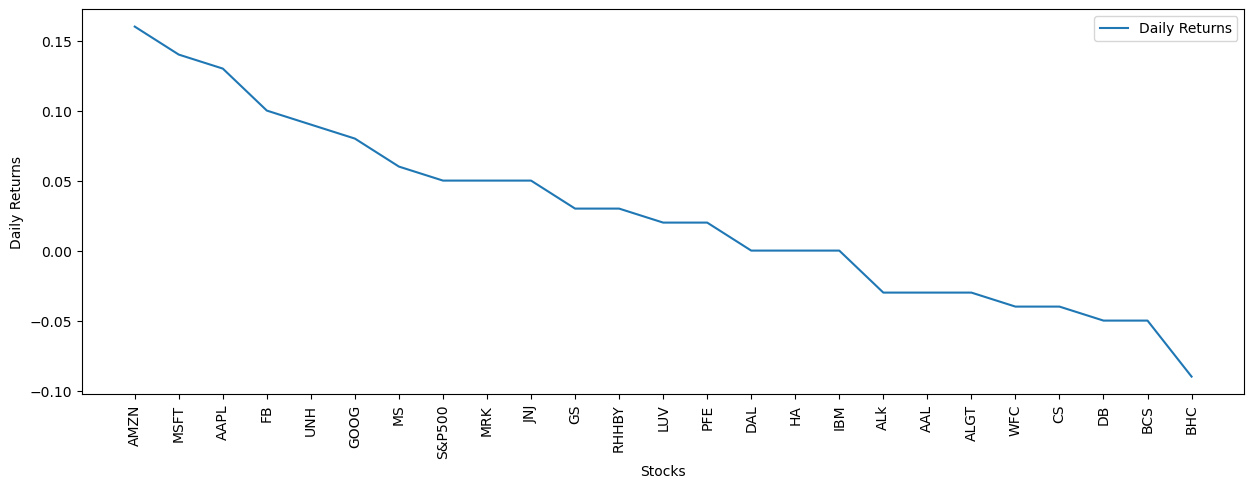

In [63]:
# Line chart showing daily returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Average_Daily_Returns'], label="Daily Returns")

# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Daily Returns")

plt.show()

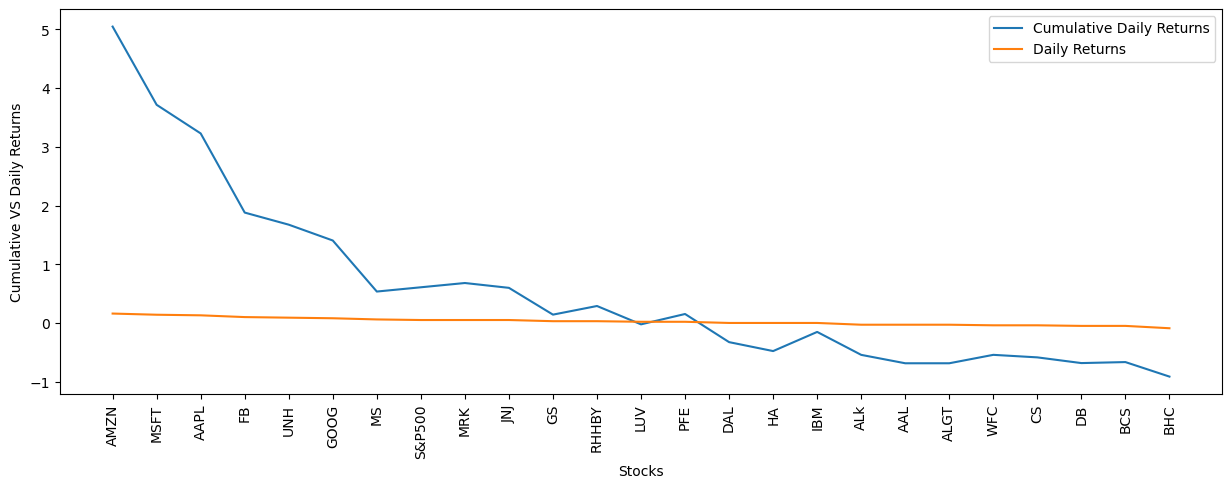

In [64]:
# Line chart showing daily returns and cumulative daily returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Cumulative Returns']/100, label="Cumulative Daily Returns")
sns.lineplot(data=df_final['Average_Daily_Returns'], label="Daily Returns")

# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Cumulative VS Daily Returns")

plt.show()

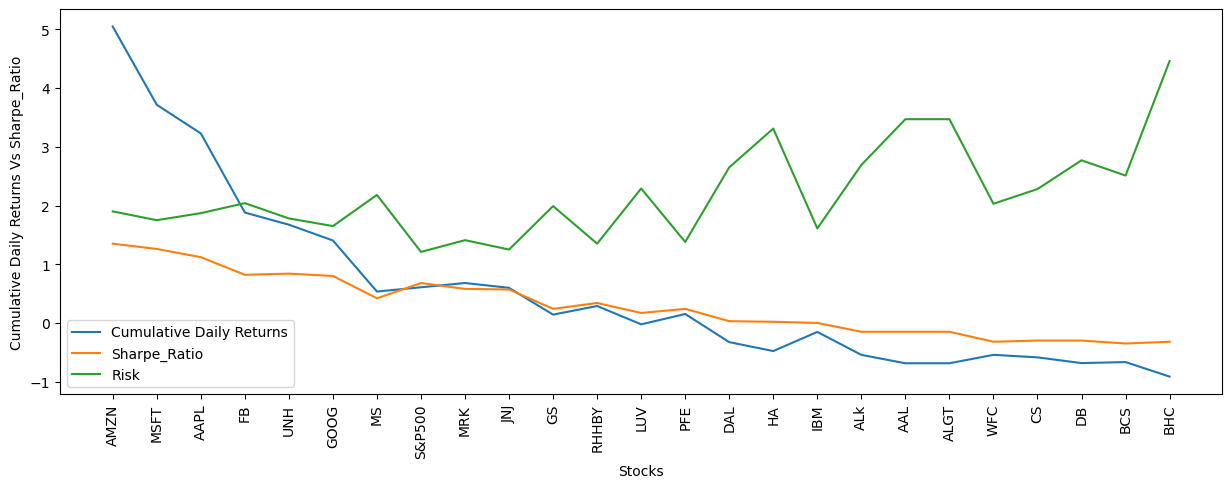

In [65]:
# line showing Cumulative returns, sharpe ratio and risk
plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Cumulative Returns']/100, label="Cumulative Daily Returns")
sns.lineplot(data=df_final['Sharpe_Ratio'], label="Sharpe_Ratio")
sns.lineplot(data=df_final['Risk'], label="Risk")


# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Cumulative Daily Returns Vs Sharpe_Ratio")

plt.show()


## Portfolio Analysis

### 1. Mr Patrick Jyengar 's Analysis

 He is conservative investor. He expects doubling his income with less risk in 5 years.
Stocks like JNJ,RHHBY and MRK are low risk stocks . But these would mot yield much return so he can invest in MSFT for better return.

In [66]:
# Initial weight of ecah stock
stocks = ['JNJ', 'RHHBY', 'MRK', 'MSFT']
initial_weight = np.array([0.25, 0.25, 0.25, 0.25])

In [67]:
# Creating portfolio dataset for stocks
portfolio = data.copy()
portfolio = portfolio[stocks]

In [68]:
portfolio.head()

,JNJ,RHHBY,MRK,MSFT
Date,,,,
10-01-2015,93.169998,33.220001,49.369999,44.610001
10-02-2015,93.930000,33.320000,50.139999,45.570000
10-05-2015,94.760002,33.439999,51.230000,46.630001
10-06-2015,93.419998,33.529999,49.799999,46.750000
10-07-2015,94.980003,32.549999,50.950001,46.799999


#### Daily Return from each stock
Daily return is the percentage change in the price of the stock from the previous day. This can be calculated using the percentage change in the price on a daily basis.

In [69]:
# daily return from each stock
return_stocks = portfolio.pct_change()
return_stocks.head(5)

,JNJ,RHHBY,MRK,MSFT
Date,,,,
10-01-2015,NaN,NaN,NaN,NaN
10-02-2015,0.008157,0.003010,0.015597,0.021520
10-05-2015,0.008836,0.003601,0.021739,0.023261
10-06-2015,-0.014141,0.002691,-0.027913,0.002573
10-07-2015,0.016699,-0.029228,0.023092,0.001069


#### Average Daily Returns from each stock
Average daily return for each stock can be calculated using the dataframe created above - "return_stocks"

In [70]:
# Average Daily Returns from each stock
daily_returns_mean = return_stocks.mean()
print(daily_returns_mean)

JNJ      0.000451
RHHBY    0.000293
MRK      0.000511
MSFT     0.001387
dtype: float64


Microsoft MSFT seems to be the best performer 

#### Risk of stocks in portfolio

In [71]:
stock_risk = return_stocks.std()
print(stock_risk)

JNJ      0.012459
RHHBY    0.013514
MRK      0.014067
MSFT     0.017539
dtype: float64


#### Total Portfolio Return

In [72]:
# Total Portfolio Return - Store the reults in "portfolio_return"
allocated_daily_returns = (initial_weight * daily_returns_mean)
portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)

0.0006603738600705663


#### Daily return from the portfolio
The weighted average can be calculated to determine the return from the portfolio on a daily basis.

In [73]:
# Portfolio daily returns
return_stocks['Portfolio_Daily_Return'] = return_stocks.dot(initial_weight)
return_stocks.tail(5)

,JNJ,RHHBY,MRK,MSFT,Portfolio_Daily_Return
Date,,,,,
24-09-2020,0.001592,-0.003567,0.006293,0.012962,0.004320
25-09-2020,0.006843,0.002685,-0.002646,0.022787,0.007417
28-09-2020,0.009955,-0.015841,-0.002050,0.007795,-0.000035
29-09-2020,-0.000340,-0.016776,-0.010391,-0.010409,-0.009479
30-09-2020,0.012376,-0.012912,0.012820,0.014812,0.006774


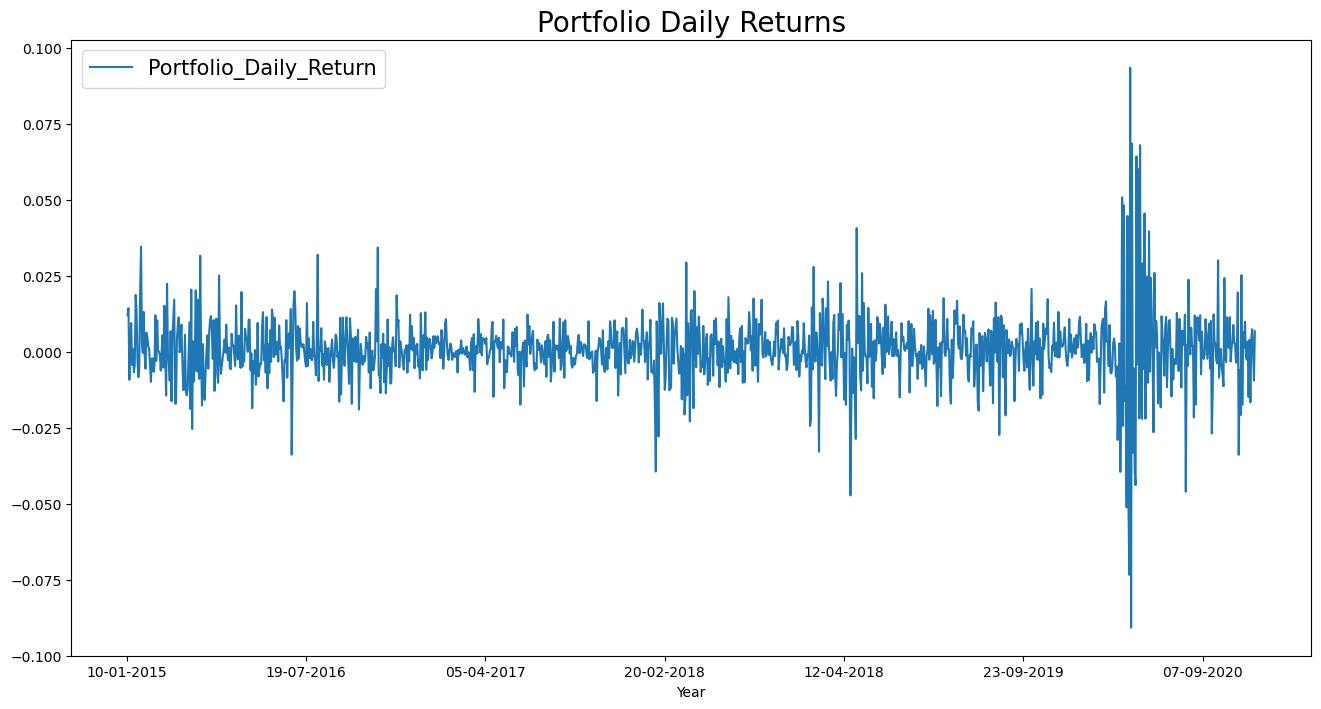

In [74]:
# Plot
plt.figure(figsize=(16,8))
return_stocks['Portfolio_Daily_Return'].plot()
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()

#### Cumulative return from the Portfolio
Cumulative return of an investment is the cumulative gain or loss from an investment over the given period of time.

In [75]:
# Cumulative return from the portfolio
Cumulative_returns_daily = (1+return_stocks).cumprod()
Cumulative_returns_daily.tail(5)

,JNJ,RHHBY,MRK,MSFT,Portfolio_Daily_Return
Date,,,,,
24-09-2020,1.552753,1.345575,1.684221,4.554808,2.106791
25-09-2020,1.563379,1.349187,1.679765,4.658597,2.122417
28-09-2020,1.578942,1.327815,1.676322,4.694911,2.122342
29-09-2020,1.578405,1.305539,1.658902,4.646043,2.102224
30-09-2020,1.597939,1.288682,1.680170,4.714862,2.116465


In [76]:
round(Cumulative_returns_daily.mean()*100)

JNJ                       139.0
RHHBY                     101.0
MRK                       138.0
MSFT                      229.0
Portfolio_Daily_Return    147.0
dtype: float64

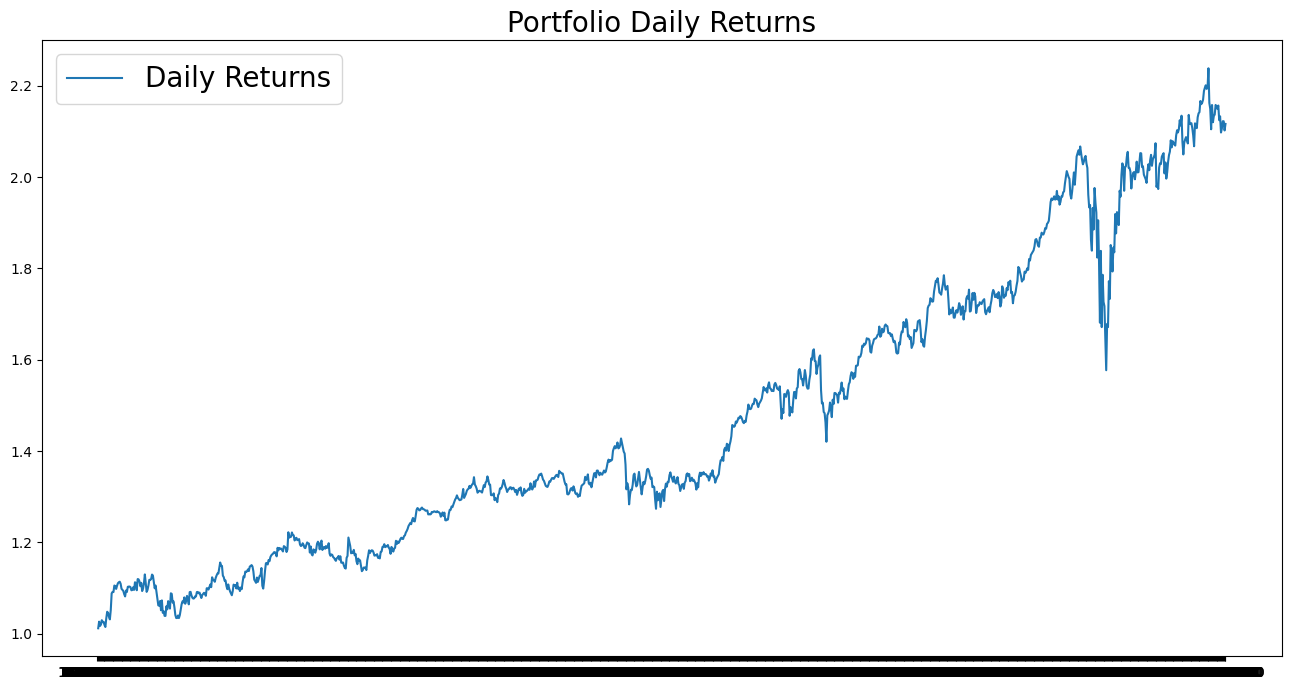

In [77]:
# plot
plt.figure(figsize=(16,8))
plt.plot(Cumulative_returns_daily['Portfolio_Daily_Return'], label = 'Daily Returns')
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

#### Portfolio Risk – Portfolio Standard Deviation

For portfolio standard deviation formula, we need three elements:
- Portfolio weight array
- Portfolio covariance matrix
- Transpose of portfolio weight array

The weight for each stock in the portfolio is already abailable. We need to calculate the daily covariance. Remember, the covariance must be annualised by multiplying with 252 (the trading days in a year).

In [78]:
# Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = return_stocks.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

,JNJ,RHHBY,MRK,MSFT
JNJ,0.039117,0.019560,0.025844,0.028277
RHHBY,0.019560,0.046023,0.020306,0.029796
MRK,0.025844,0.020306,0.049865,0.029374
MSFT,0.028277,0.029796,0.029374,0.077524


In [79]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))

In [80]:
portfolio_variance

0.032427853378607326

In [81]:
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.18007735387495932

#### Sharpe Ratio

In [82]:
# Assuming that the risk free rate is zero
Sharpe_Ratio = return_stocks['Portfolio_Daily_Return'].mean() / return_stocks['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.058214482892313575

In [83]:
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio
Annualised_Sharpe_Ratio

0.9241262666117149

#### Total ROI from the Portfolio

In [84]:
invested_amount=500000
Cummulative_returns=Cumulative_returns_daily['Portfolio_Daily_Return'][-1]
Expected_Return=invested_amount*Cummulative_returns
Expected_Return

1058232.526596431

In [85]:
Expected_earning = Expected_Return - invested_amount
Expected_earning

558232.5265964309

#### 2. Mr Peter Jyengar's Analysis

Consistent with his attitude towards risk, he prefers high-return iinvestments. He believes the he can still bounce back in case of any occasional losses. He can invest in amazon AMZN stock as it has high return with higher risk.

In [86]:
# Initial weight of ecah stock
stocks = ['AMZN']
initial_weight = np.array([1])

In [87]:
# Creating portfolio dataset for stocks
portfolio_P = data.copy()
portfolio_P = portfolio_P[stocks]

In [88]:
portfolio_P.head()

,AMZN
Date,
10-01-2015,520.719971
10-02-2015,532.539978
10-05-2015,543.679993
10-06-2015,537.479980
10-07-2015,541.940002


#### Daily Return from each stock
Daily return is the percentage change in the price of the stock from the previous day. This can be calculated using the percentage change in the price on a daily basis.

In [89]:
# daily return from each stock
return_stocks = portfolio_P.pct_change()
return_stocks.head(5)

,AMZN
Date,
10-01-2015,NaN
10-02-2015,0.022699
10-05-2015,0.020919
10-06-2015,-0.011404
10-07-2015,0.008298


#### Average Daily Returns from each stock
Average daily return for each stock can be calculated using the dataframe created above - "return_stocks" 

In [90]:
# Average Daily Returns from each stock
daily_returns_mean = return_stocks.mean()
print(daily_returns_mean)

AMZN    0.001611
dtype: float64


#### Risk of stocks in portfolio

In [91]:
stock_risk = return_stocks.std()
print(stock_risk)

AMZN    0.018969
dtype: float64


#### Total Portfolio Return

In [92]:
# Total Portfolio Return - Store the reults in "portfolio_return"
allocated_daily_returns = (initial_weight * daily_returns_mean)
portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)

0.0016105339261582269


#### Daily return from the portfolio
The weighted average can be calculated to determine the return from the portfolio on a daily basis.

In [93]:
# Portfolio daily returns
return_stocks['Portfolio_Daily_Return'] = return_stocks.dot(initial_weight)
return_stocks.tail(5)

,AMZN,Portfolio_Daily_Return
Date,,
24-09-2020,0.006644,0.006644
25-09-2020,0.024949,0.024949
28-09-2020,0.025498,0.025498
29-09-2020,-0.009190,-0.009190
30-09-2020,0.001224,0.001224


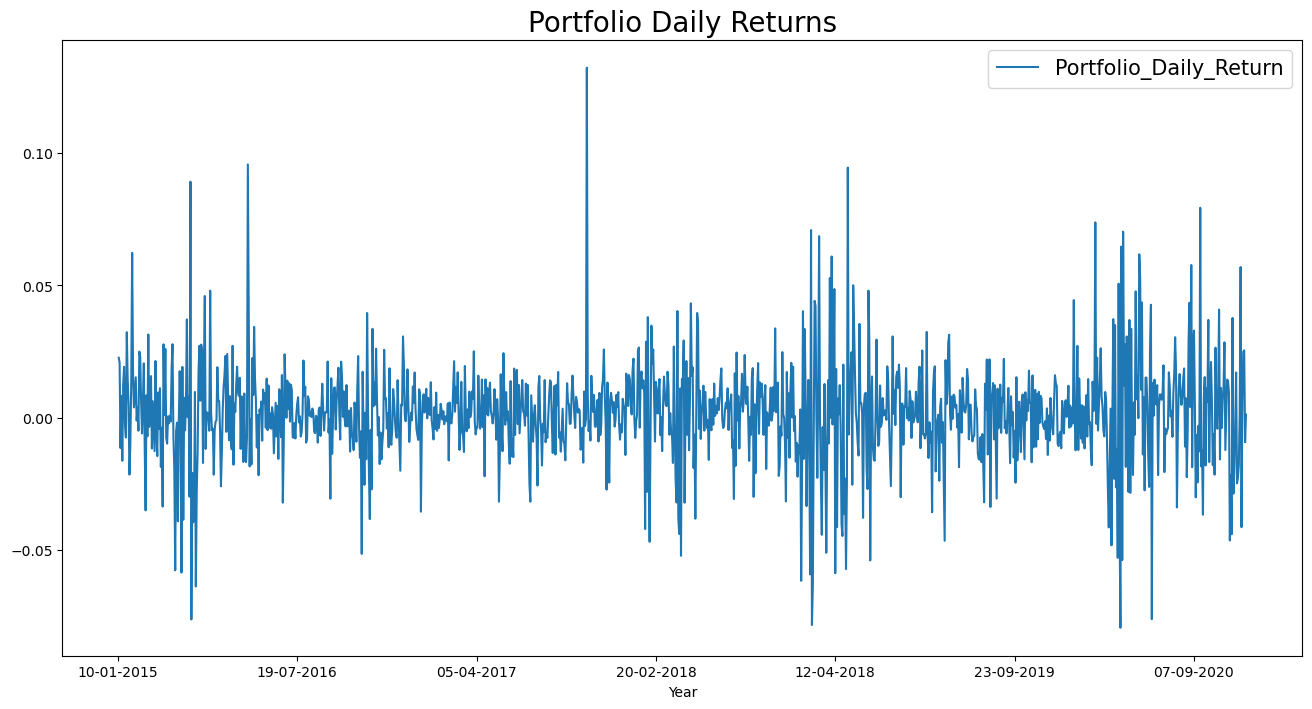

In [94]:
# Plot
plt.figure(figsize=(16,8))
return_stocks['Portfolio_Daily_Return'].plot()
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()

#### Cumulative return from the Portfolio
Cumulative return of an investment is the cumulative gain or loss from an investment over the given period of time.

In [95]:
# Cumulative return from the portfolio
Cumulative_returns_daily = (1+return_stocks).cumprod()
Cumulative_returns_daily.tail(5)

,AMZN,Portfolio_Daily_Return
Date,,
24-09-2020,5.799259,5.799259
25-09-2020,5.943943,5.943943
28-09-2020,6.095503,6.095503
29-09-2020,6.039484,6.039484
30-09-2020,6.046878,6.046878


In [96]:
round(Cumulative_returns_daily.mean()*100)

AMZN                      274.0
Portfolio_Daily_Return    274.0
dtype: float64

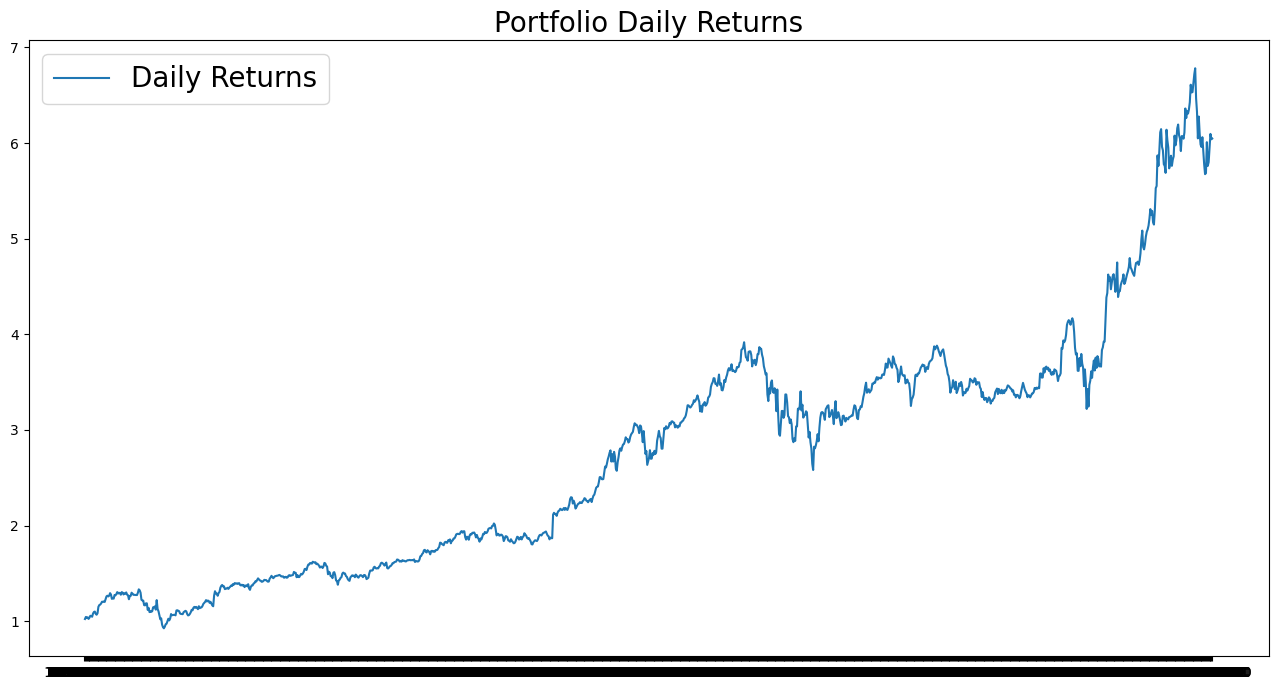

In [97]:
# plot
plt.figure(figsize=(16,8))
plt.plot(Cumulative_returns_daily['Portfolio_Daily_Return'], label = 'Daily Returns')
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

#### Portfolio Risk – Portfolio Standard Deviation

For portfolio standard deviation formula, we need three elements:
- Portfolio weight array
- Portfolio covariance matrix
- Transpose of portfolio weight array

The weight for each stock in the portfolio is already abailable. We need to calculate the daily covariance. Remember, the covariance must be annualised by multiplying with 252 (the trading days in a year).

In [98]:
#  Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = return_stocks.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

,AMZN
AMZN,0.090671


In [99]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))

In [100]:
portfolio_variance

0.09067120800905354

In [101]:
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.3011166020149894

#### Sharpe ratio

In [102]:
# Assuming that the risk free rate is zero
Sharpe_Ratio = return_stocks['Portfolio_Daily_Return'].mean() / return_stocks['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.08490542636573083

In [103]:
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio
Annualised_Sharpe_Ratio

1.3478318587417824

#### Total ROI from the Portfolio

In [104]:
invested_amount=1000000
Cummulative_returns=Cumulative_returns_daily['Portfolio_Daily_Return'][-1]
Expected_Return=invested_amount*Cummulative_returns
Expected_Return

6046877.6988774445

In [105]:
Expected_earning = Expected_Return - invested_amount
Expected_earning

5046877.6988774445

## Conclusion

1. We have analyzed the stocks of aviation sector, healthcare, technology, pharma, finance and s&p500. We have looked at historical prices of these stocks for last 5 years for better analysis.
2. It is better to by stocks with low riskd and high return. We have seen amazon stocks has high risks and high return. BHC Bausch health comapny inc has low return and high risks
3. Calculated the estimated income of Patrick and Peter and found that Patrcik cn earn 1+ milion and Peter can earn more than 6+ million dollors 